In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

countries = ['China', 'Germany', 'France', 'United Kingdom', 'Israel', 'Italy', 'Korea, Rep.', 'Russian Federation', 'Saudi Arabia', 'United States']
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

population = pd.read_excel("Population.xlsx", sheet_name="Data", header=3, index_col="Country Name")
total_gdp = pd.read_excel("GDP (2010 USD).xlsx", sheet_name="Data", header=3, index_col="Country Name")
military_exp = pd.read_excel("Military expenditure (% of GDP).xlsx", sheet_name="Data", header=3, index_col="Country Name")

#Filtering for required countries and years
pop = population.loc[countries, years] / 10**9    #in billions
gdp = total_gdp.loc[countries, years] / 10**9     #in billions
military = military_exp.loc[countries, years]

#Total Military Expenditure in constant 2010 USD (in billion)
tot_mil = (military/100) * gdp

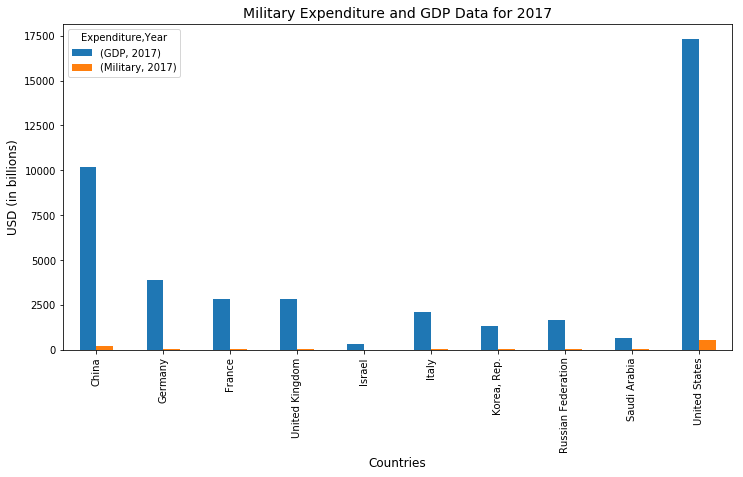

In [2]:
# Comparison of military expenditure to GDP for all countries for the year 2017

gdp_mil = pd.concat([gdp, tot_mil], axis=1, keys=['GDP', 'Military'], names=['Expenditure', 'Year'])
gdp_mil.iloc[:, [7,15]].plot(kind='bar', figsize=(12,6))
plt.xlabel("Countries", fontsize=12)
plt.ylabel("USD (in billions)", fontsize=12)
plt.title("Military Expenditure and GDP Data for 2017", fontsize=14)
plt.show()

Comparison of military spending with GDP for each country: 



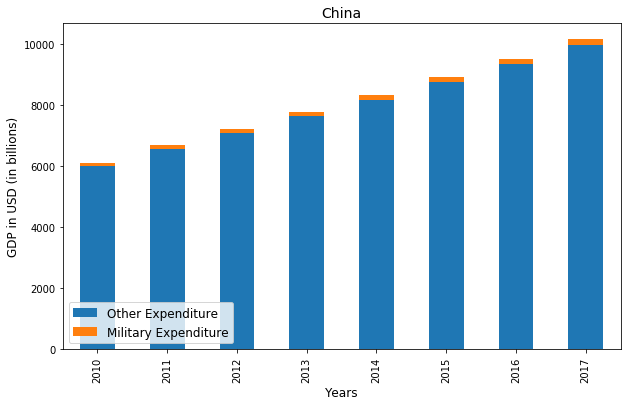

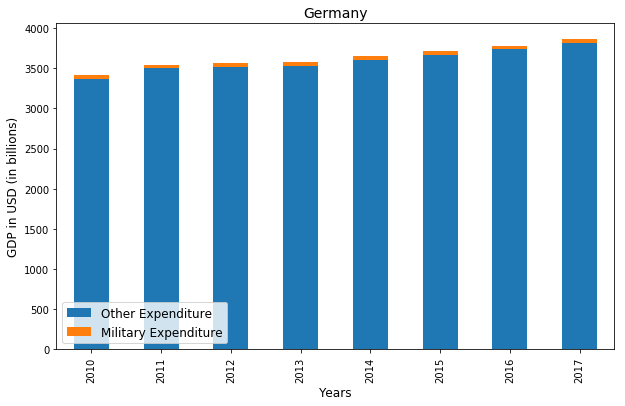

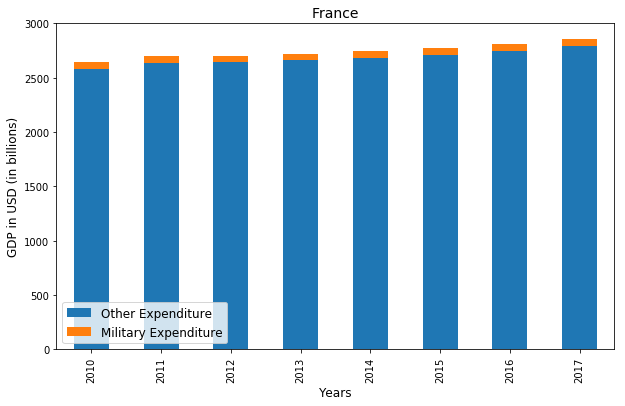

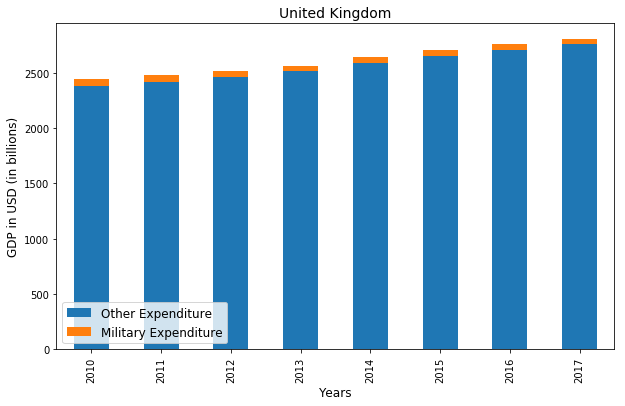

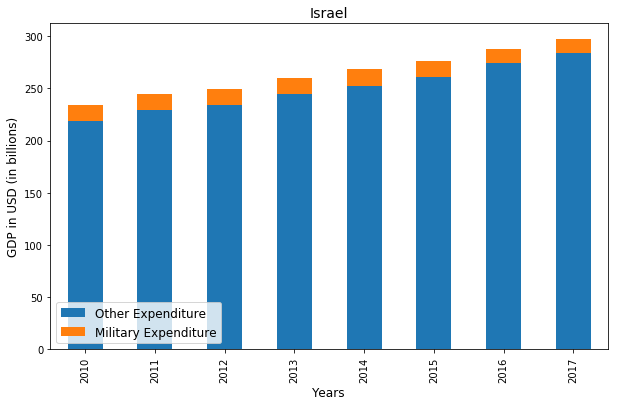

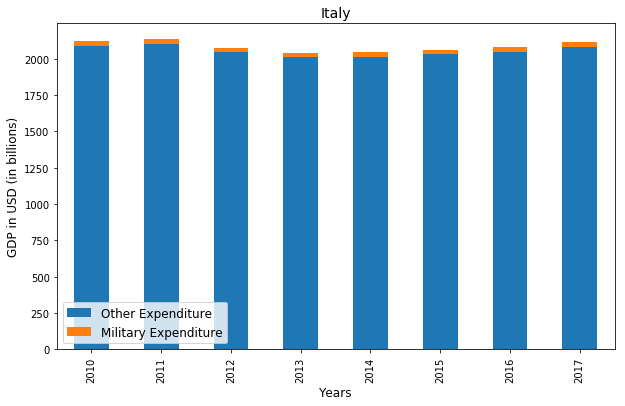

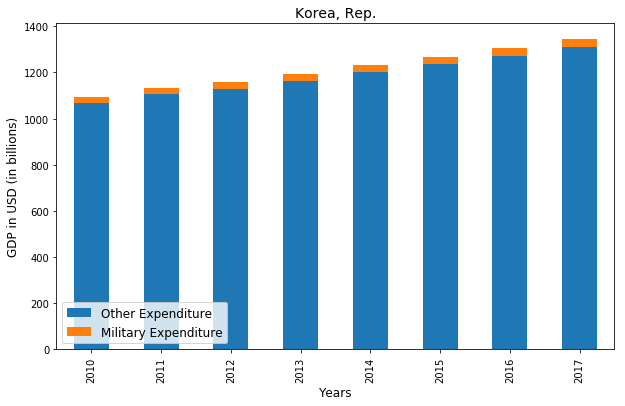

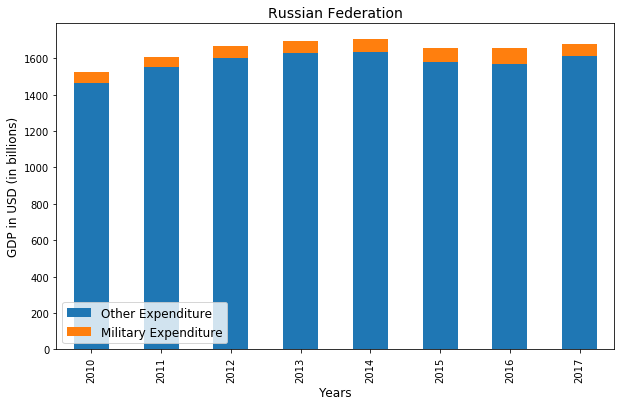

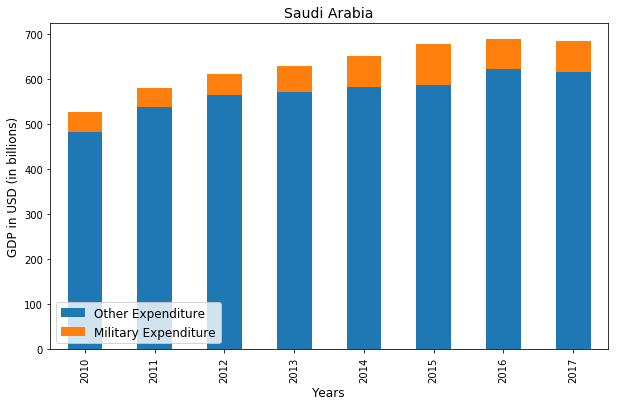

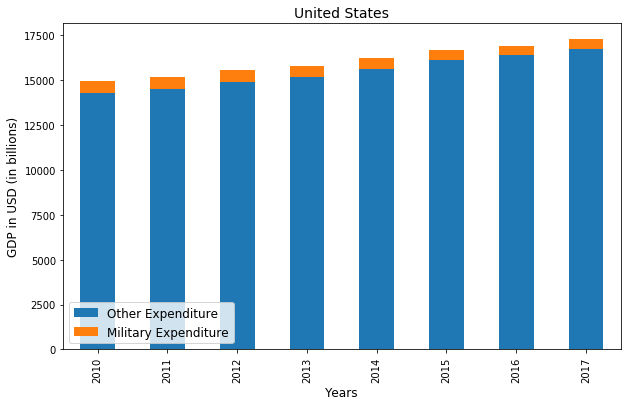

In [3]:
# Function to compare the data to that country’s GDP
def compare_with_gdp(country):
    """
    country: Input parameter to specify the country name for which data is to be compared
    Output: plots stacked bar charts to compare military spending with the country's GDP
    """
    difference = gdp.loc[country,:]-tot_mil.loc[country,:]
    newdf = pd.concat([difference, tot_mil.loc[country,:]], axis=1, keys=['Other Expenditure', 'Military Expenditure'])
    newdf.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(country, fontsize=14)
    plt.xlabel('Years', fontsize=12)
    plt.ylabel('GDP in USD (in billions)', fontsize=12)
    plt.legend(loc='lower left', fontsize=12)

print("Comparison of military spending with GDP for each country: \n")

# Loop over countries to call compare_with_gdp()
for country in countries:
    compare_with_gdp(country)
    


Comparison of overall military spending of the 10 countries: 



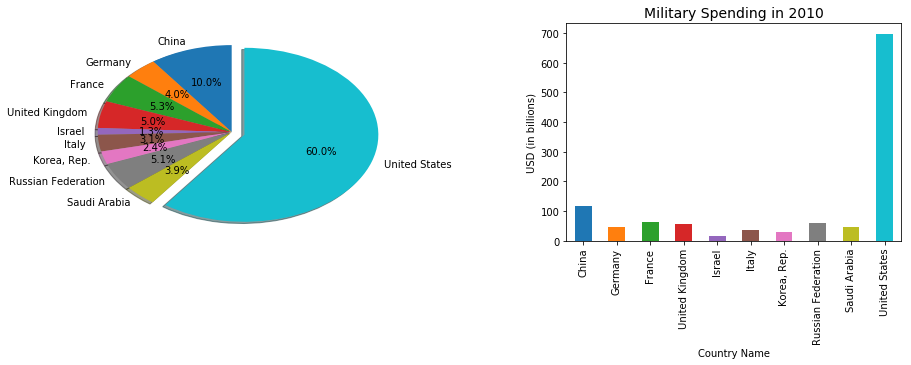

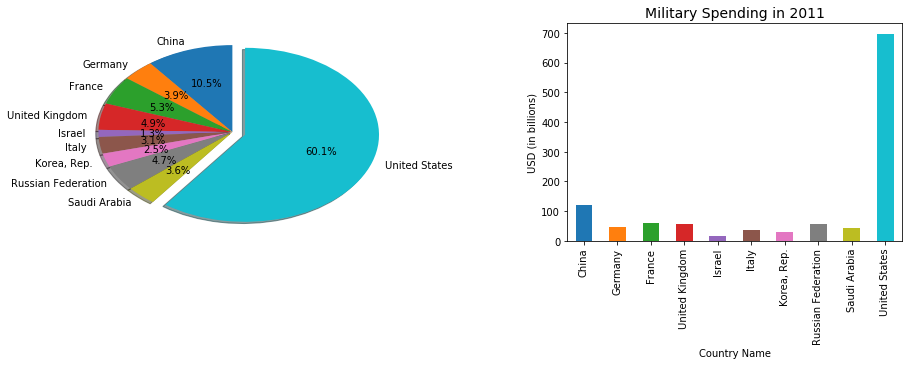

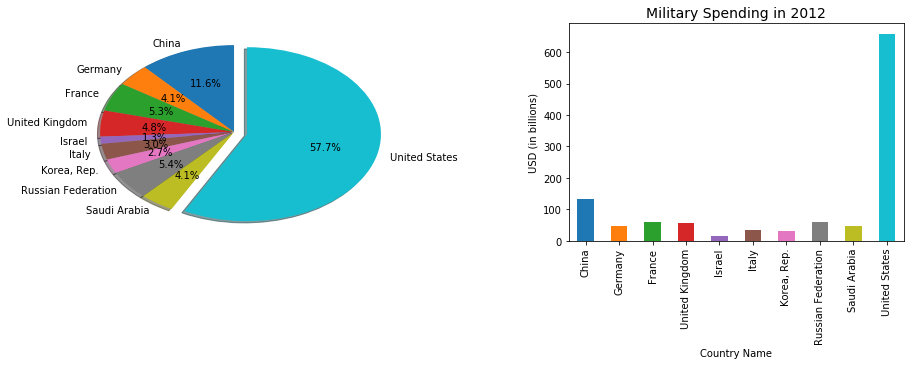

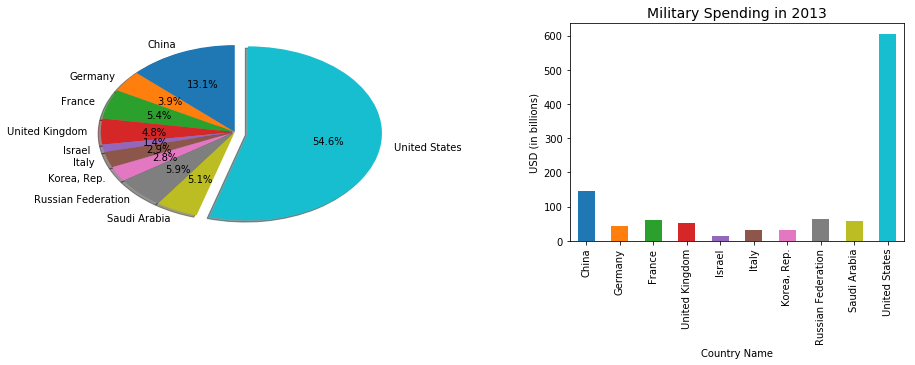

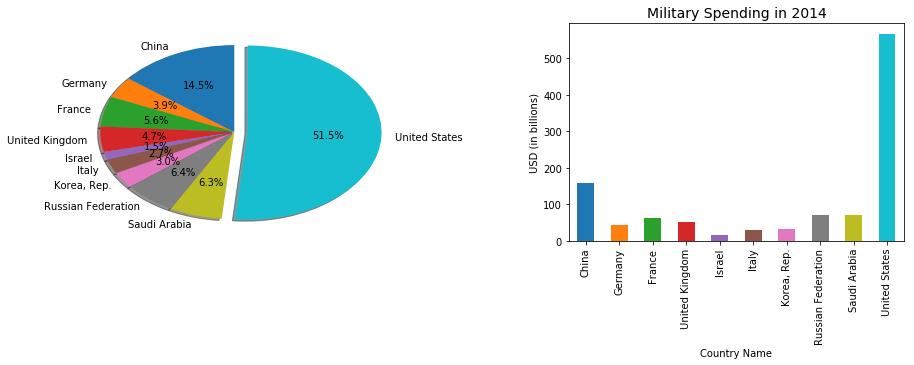

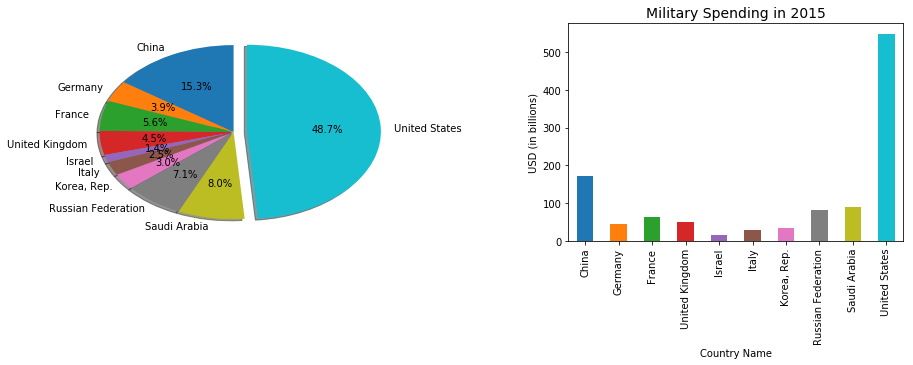

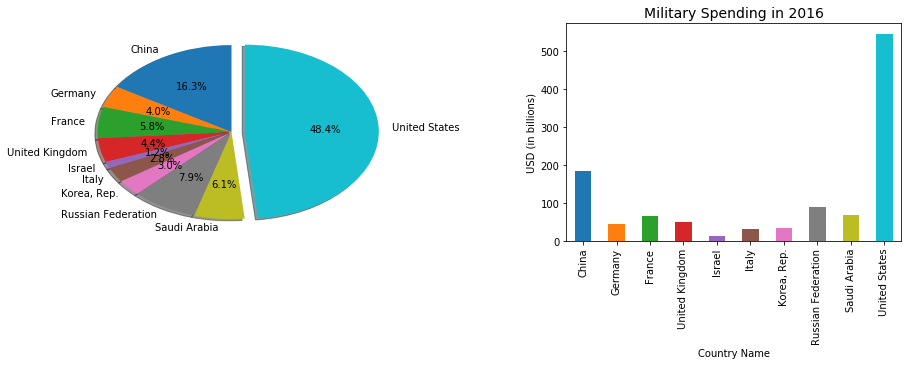

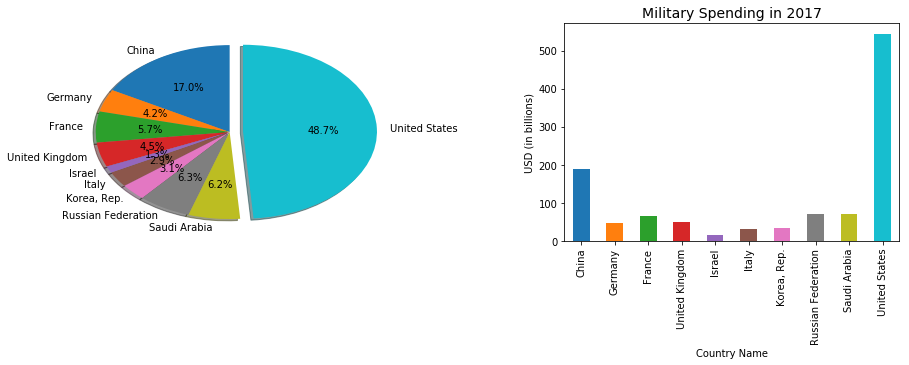

In [4]:
# Function to compare the data to the overall military spending of the all 10 countries
def overall_military_spending(year):
    """
    year: Input parameter to select the year for which data has to be compared
    Output: plots the proportion of military expenditure of all countries for the given year
    """
    f, axes = plt.subplots(1,2, figsize=(15,4))
    plt.subplots_adjust(wspace=0.5)
    axes[0].pie(tot_mil.loc[:, year], labels=countries, explode=(0,0,0,0,0,0,0,0,0,0.1), shadow=True, autopct='%1.1f%%', startangle=90)
    plt.title('Military Spending in '+ year, fontsize=14)
    tot_mil.loc[:, year].plot(kind='bar', ax=axes[1])
    plt.ylabel('USD (in billions)')
    plt.show()
    
print("Comparison of overall military spending of the 10 countries: \n")
    
# Loop over years to call overall_military_spending()
for year in years:
    overall_military_spending(year)

Total military spending by all the countries in the last 7 years: 



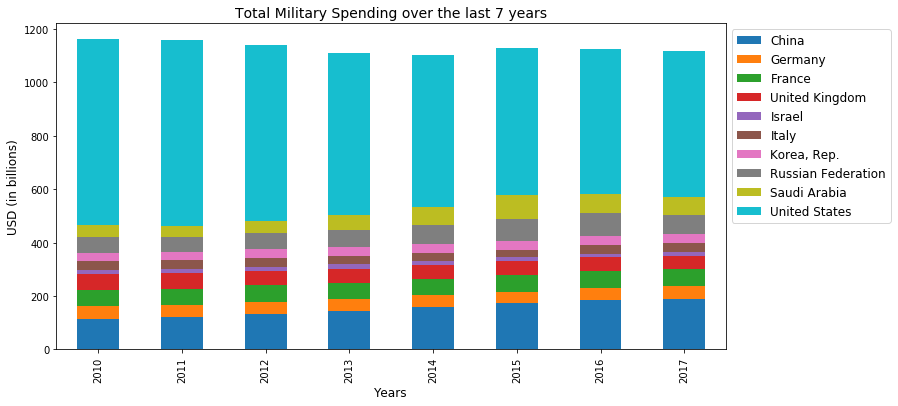

In [5]:
# Total military spending in the last 7 years

print("Total military spending by all the countries in the last 7 years: \n")

tot_mil.transpose().plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Total Military Spending over the last 7 years", fontsize=14)
plt.xlabel("Years", fontsize=12)
plt.ylabel("USD (in billions)", fontsize=12)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize=12)
plt.show()

Comparison of military expenditure per person and GDP per person for all countries: 



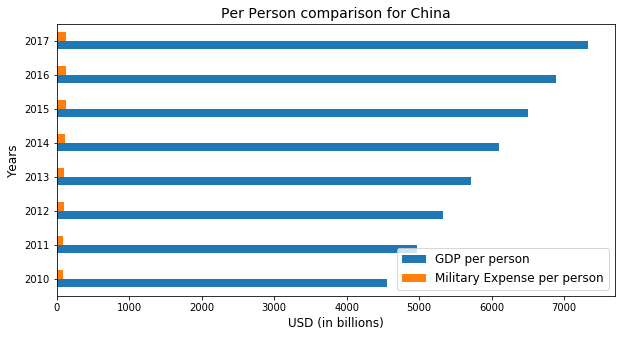

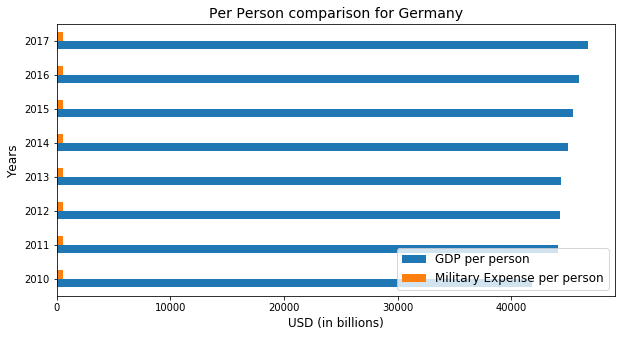

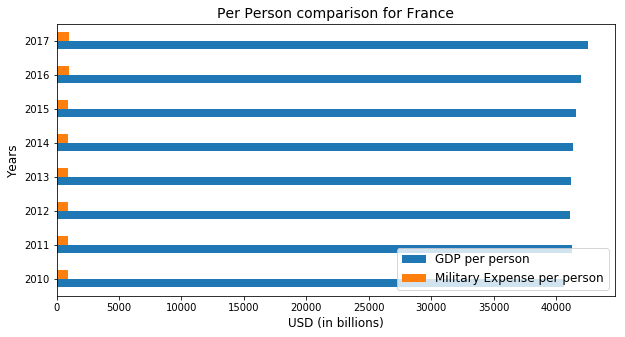

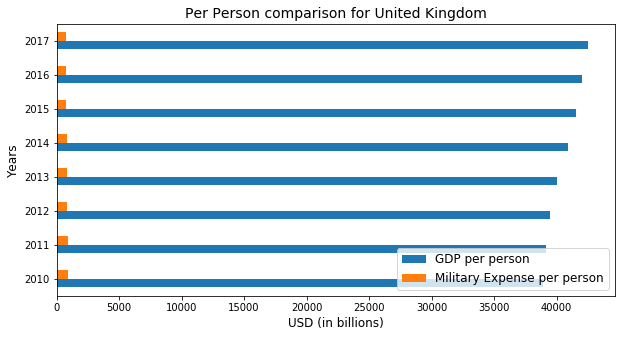

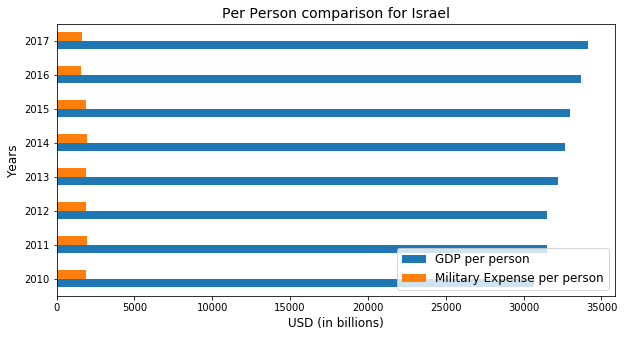

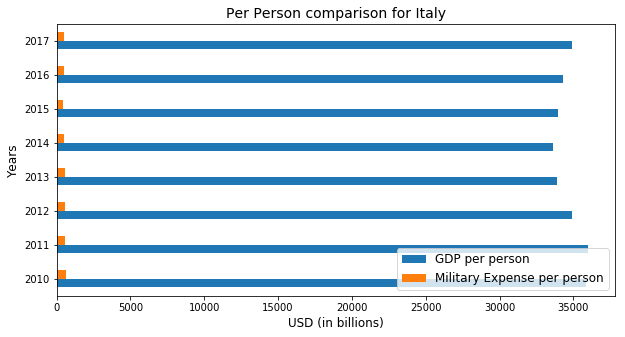

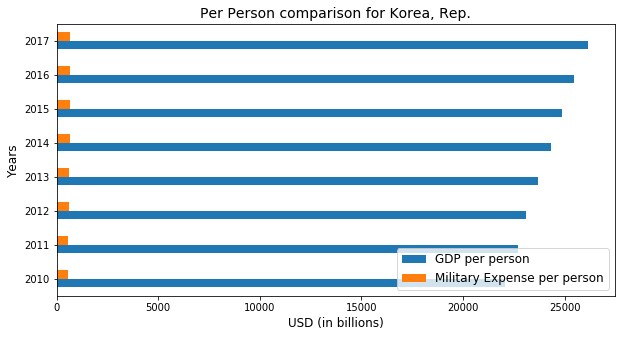

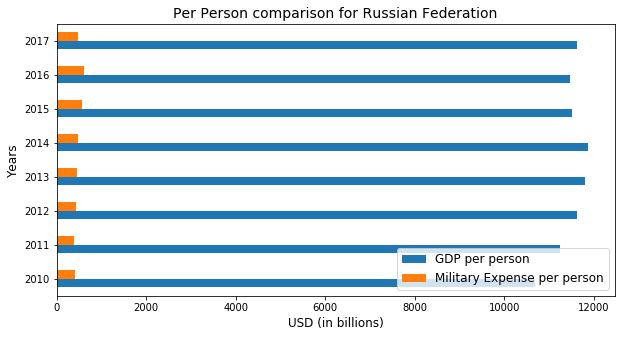

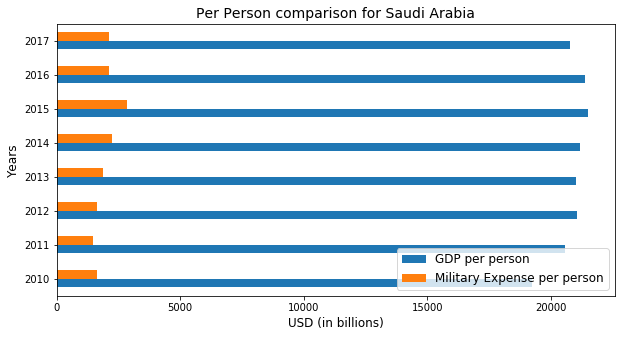

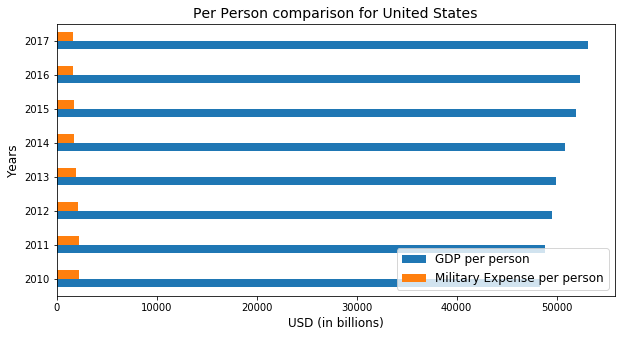

In [6]:
# Compare the per person military spending to the per person GDP

# gdp per person
gdp_per_person = gdp/pop

# military expenditure per person
military_per_person = tot_mil/pop

# Function to compare per person data
def per_person(country):
    """
    country: Input parameter to specify the country name for which data is to be compared
    Output: plots horizontal bar charts to compare gdp per person and military expenditure per person for the given country
    """
    newdf = pd.concat([gdp_per_person.loc[country, :], military_per_person.loc[country, :]], axis=1, keys=['GDP per person', 'Military Expense per person'])   
    newdf.plot(kind='barh', title=country, figsize=(10,5))
    plt.xlabel('USD (in billions)', fontsize=12)
    plt.ylabel('Years', fontsize=12)
    plt.title('Per Person comparison for '+ country, fontsize=14)
    plt.legend(loc="lower right", fontsize=12)
    
print("Comparison of military expenditure per person and GDP per person for all countries: \n")
    
# Loop over countries to call per_person() 
for country in countries:
    per_person(country)

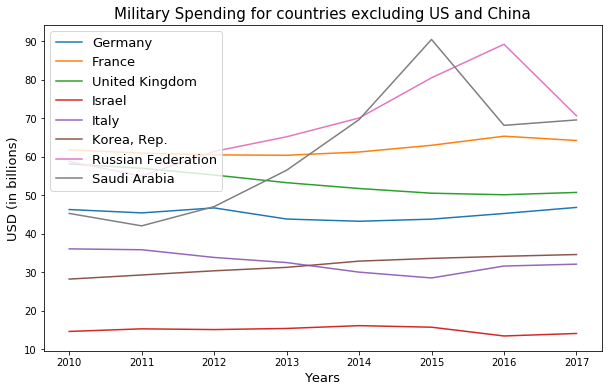

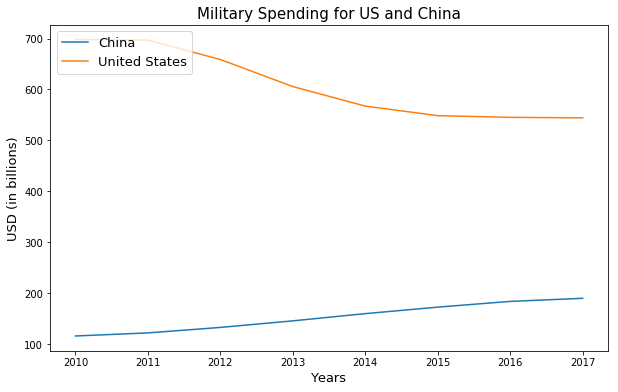

In [7]:
# Single out the fastest growing countries in military spending in fixed value and in percentage

# Subset the dataframe to exclude US and China
df1 = tot_mil.iloc[1:9, :].transpose() 
ax = df1.plot(figsize=(10,6))
ax.set_xticks(range(8))
ax.set_xticklabels(df1.index)
plt.legend(loc='upper left', fontsize=13)
plt.xlabel("Years", fontsize=13)
plt.ylabel("USD (in billions)", fontsize=13)
plt.title("Military Spending for countries excluding US and China", fontsize=15)
plt.show()

# Subset the dataframe for US and China
df2 = tot_mil.iloc[[0,9], :].transpose()
ax2 = df2.plot(figsize=(10,6))
ax2.set_xticks(range(8))
ax2.set_xticklabels(df2.index)
plt.legend(loc='upper left', fontsize=13)
plt.xlabel("Years", fontsize=13)
plt.ylabel("USD (in billions)", fontsize=13)
plt.title("Military Spending for US and China", fontsize=15)
plt.show()



In [24]:
# Compunded annual growth rate in military spending for all countries over 7 years (i.e., 2017-2010 = 7)

growth_rate_fixed = (tot_mil.loc[:, '2017'] - tot_mil.loc[:, '2010']) / 7    
print("The annual growth in USD (in billions) over the last 7 years (in descending order) is: ")
print(growth_rate_fixed.sort_values(ascending=False))

growth_rate = ((tot_mil.loc[:, '2017'] / tot_mil.loc[:, '2010'])**(1/7) - 1) * 100
print("\nThe annual growth rate in percentange over the last 7 years (in descending order) is: ")
print(growth_rate.sort_values(ascending=False))

The annual growth in USD (in billions) over the last 7 years (in descending order) is: 
Country Name
China                 10.569408
Saudi Arabia           3.469601
Russian Federation     1.699612
Korea, Rep.            0.912005
France                 0.344151
Germany                0.078110
Israel                -0.075282
Italy                 -0.568676
United Kingdom        -1.055291
United States        -22.000933
dtype: float64

The annual growth rate in percentange over the last 7 years (in descending order) is: 
Country Name
China                 7.317192
Saudi Arabia          6.330919
Korea, Rep.           2.960593
Russian Federation    2.670667
France                0.547952
Germany               0.168018
Israel               -0.524771
Italy                -1.658518
United Kingdom       -1.924487
United States        -3.497500
dtype: float64
